In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
!cp /content/gdrive/MyDrive/2390_Qi_Tian/2390--Spring2022/Week03/*.mat /content/

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
cp: cannot stat '/content/gdrive/MyDrive/2390_Qi_Tian/2390--Spring2022/Week03/*.mat': No such file or directory


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import welch, get_window
import scipy.io as scio
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

In [3]:
samplingFrequency = 500
sub1_s1_data = pd.read_csv('/content/gdrive/MyDrive/Pitt_Year2_Semester_2/BIOENG2390/2390_GroupProject/data/sub1/subj1_series1_data.csv')
sub1_s1_events = pd.read_csv('/content/gdrive/MyDrive/Pitt_Year2_Semester_2/BIOENG2390/2390_GroupProject/data/sub1/subj1_series1_events.csv')
sub1_s1_events = sub1_s1_events.to_numpy()[:,1:].astype(int)

sub1_s2_data = pd.read_csv('/content/gdrive/MyDrive/Pitt_Year2_Semester_2/BIOENG2390/2390_GroupProject/data/sub1/subj1_series2_data.csv')
sub1_s2_events = pd.read_csv('/content/gdrive/MyDrive/Pitt_Year2_Semester_2/BIOENG2390/2390_GroupProject/data/sub1/subj1_series3_events.csv')
sub1_s2_events = sub1_s2_events.to_numpy()[:,1:].astype(int)

sub1_s3_data = pd.read_csv('/content/gdrive/MyDrive/Pitt_Year2_Semester_2/BIOENG2390/2390_GroupProject/data/sub1/subj1_series3_data.csv')
sub1_s3_events = pd.read_csv('/content/gdrive/MyDrive/Pitt_Year2_Semester_2/BIOENG2390/2390_GroupProject/data/sub1/subj1_series3_events.csv')
sub1_s3_events = sub1_s3_events.to_numpy()[:,1:].astype(int)

sub1_s4_data = pd.read_csv('/content/gdrive/MyDrive/Pitt_Year2_Semester_2/BIOENG2390/2390_GroupProject/data/sub1/subj1_series4_data.csv')
sub1_s4_events = pd.read_csv('/content/gdrive/MyDrive/Pitt_Year2_Semester_2/BIOENG2390/2390_GroupProject/data/sub1/subj1_series4_events.csv')
sub1_s4_events = sub1_s4_events.to_numpy()[:,1:].astype(int)

sub1_s5_data = pd.read_csv('/content/gdrive/MyDrive/Pitt_Year2_Semester_2/BIOENG2390/2390_GroupProject/data/sub1/subj1_series5_data.csv')
sub1_s5_events = pd.read_csv('/content/gdrive/MyDrive/Pitt_Year2_Semester_2/BIOENG2390/2390_GroupProject/data/sub1/subj1_series5_events.csv')
sub1_s5_events = sub1_s5_events.to_numpy()[:,1:].astype(int)

sub1_s6_data = pd.read_csv('/content/gdrive/MyDrive/Pitt_Year2_Semester_2/BIOENG2390/2390_GroupProject/data/sub1/subj1_series6_data.csv')
sub1_s6_events = pd.read_csv('/content/gdrive/MyDrive/Pitt_Year2_Semester_2/BIOENG2390/2390_GroupProject/data/sub1/subj1_series6_events.csv')
sub1_s6_events = sub1_s6_events.to_numpy()[:,1:].astype(int)

sub1_s7_data = pd.read_csv('/content/gdrive/MyDrive/Pitt_Year2_Semester_2/BIOENG2390/2390_GroupProject/data/sub1/subj1_series7_data.csv')
sub1_s7_events = pd.read_csv('/content/gdrive/MyDrive/Pitt_Year2_Semester_2/BIOENG2390/2390_GroupProject/data/sub1/subj1_series7_events.csv')
sub1_s7_events = sub1_s7_events.to_numpy()[:,1:].astype(int)

sub1_s8_data = pd.read_csv('/content/gdrive/MyDrive/Pitt_Year2_Semester_2/BIOENG2390/2390_GroupProject/data/sub1/subj1_series8_data.csv')
sub1_s8_events = pd.read_csv('/content/gdrive/MyDrive/Pitt_Year2_Semester_2/BIOENG2390/2390_GroupProject/data/sub1/subj1_series8_events.csv')
sub1_s8_events = sub1_s8_events.to_numpy()[:,1:].astype(int)

sub2_s1_data = pd.read_csv('/content/gdrive/MyDrive/Pitt_Year2_Semester_2/BIOENG2390/2390_GroupProject/data/sub2/subj2_series1_data.csv')
sub2_s1_events = pd.read_csv('/content/gdrive/MyDrive/Pitt_Year2_Semester_2/BIOENG2390/2390_GroupProject/data/sub2/subj2_series1_events.csv')
sub2_s1_events = sub2_s1_events.to_numpy()[:,1:].astype(int)

sub2_s2_data = pd.read_csv('/content/gdrive/MyDrive/Pitt_Year2_Semester_2/BIOENG2390/2390_GroupProject/data/sub2/subj2_series2_data.csv')
sub2_s2_events = pd.read_csv('/content/gdrive/MyDrive/Pitt_Year2_Semester_2/BIOENG2390/2390_GroupProject/data/sub2/subj2_series3_events.csv')
sub2_s2_events = sub2_s2_events.to_numpy()[:,1:].astype(int)

sub2_s3_data = pd.read_csv('/content/gdrive/MyDrive/Pitt_Year2_Semester_2/BIOENG2390/2390_GroupProject/data/sub2/subj2_series3_data.csv')
sub2_s3_events = pd.read_csv('/content/gdrive/MyDrive/Pitt_Year2_Semester_2/BIOENG2390/2390_GroupProject/data/sub2/subj2_series3_events.csv')
sub2_s3_events = sub2_s3_events.to_numpy()[:,1:].astype(int)

sub2_s4_data = pd.read_csv('/content/gdrive/MyDrive/Pitt_Year2_Semester_2/BIOENG2390/2390_GroupProject/data/sub2/subj2_series4_data.csv')
sub2_s4_events = pd.read_csv('/content/gdrive/MyDrive/Pitt_Year2_Semester_2/BIOENG2390/2390_GroupProject/data/sub2/subj2_series4_events.csv')
sub2_s4_events = sub2_s4_events.to_numpy()[:,1:].astype(int)

sub2_s5_data = pd.read_csv('/content/gdrive/MyDrive/Pitt_Year2_Semester_2/BIOENG2390/2390_GroupProject/data/sub2/subj2_series5_data.csv')
sub2_s5_events = pd.read_csv('/content/gdrive/MyDrive/Pitt_Year2_Semester_2/BIOENG2390/2390_GroupProject/data/sub2/subj2_series5_events.csv')
sub2_s5_events = sub2_s5_events.to_numpy()[:,1:].astype(int)

sub2_s6_data = pd.read_csv('/content/gdrive/MyDrive/Pitt_Year2_Semester_2/BIOENG2390/2390_GroupProject/data/sub2/subj2_series6_data.csv')
sub2_s6_events = pd.read_csv('/content/gdrive/MyDrive/Pitt_Year2_Semester_2/BIOENG2390/2390_GroupProject/data/sub2/subj2_series6_events.csv')
sub2_s6_events = sub2_s6_events.to_numpy()[:,1:].astype(int)

sub2_s7_data = pd.read_csv('/content/gdrive/MyDrive/Pitt_Year2_Semester_2/BIOENG2390/2390_GroupProject/data/sub2/subj2_series7_data.csv')
sub2_s7_events = pd.read_csv('/content/gdrive/MyDrive/Pitt_Year2_Semester_2/BIOENG2390/2390_GroupProject/data/sub2/subj2_series7_events.csv')
sub2_s7_events = sub2_s7_events.to_numpy()[:,1:].astype(int)

sub2_s8_data = pd.read_csv('/content/gdrive/MyDrive/Pitt_Year2_Semester_2/BIOENG2390/2390_GroupProject/data/sub2/subj2_series8_data.csv')
sub2_s8_events = pd.read_csv('/content/gdrive/MyDrive/Pitt_Year2_Semester_2/BIOENG2390/2390_GroupProject/data/sub2/subj2_series8_events.csv')
sub2_s8_events = sub2_s8_events.to_numpy()[:,1:].astype(int)

sub3_s1_data = pd.read_csv('/content/gdrive/MyDrive/Pitt_Year2_Semester_2/BIOENG2390/2390_GroupProject/data/sub3/subj3_series1_data.csv')
sub3_s1_events = pd.read_csv('/content/gdrive/MyDrive/Pitt_Year2_Semester_2/BIOENG2390/2390_GroupProject/data/sub3/subj3_series1_events.csv')
sub3_s1_events = sub3_s1_events.to_numpy()[:,1:].astype(int)

sub3_s2_data = pd.read_csv('/content/gdrive/MyDrive/Pitt_Year2_Semester_2/BIOENG2390/2390_GroupProject/data/sub3/subj3_series2_data.csv')
sub3_s2_events = pd.read_csv('/content/gdrive/MyDrive/Pitt_Year2_Semester_2/BIOENG2390/2390_GroupProject/data/sub3/subj3_series3_events.csv')
sub3_s2_events = sub3_s2_events.to_numpy()[:,1:].astype(int)

sub3_s3_data = pd.read_csv('/content/gdrive/MyDrive/Pitt_Year2_Semester_2/BIOENG2390/2390_GroupProject/data/sub3/subj3_series3_data.csv')
sub3_s3_events = pd.read_csv('/content/gdrive/MyDrive/Pitt_Year2_Semester_2/BIOENG2390/2390_GroupProject/data/sub3/subj3_series3_events.csv')
sub3_s3_events = sub3_s3_events.to_numpy()[:,1:].astype(int)

sub3_s4_data = pd.read_csv('/content/gdrive/MyDrive/Pitt_Year2_Semester_2/BIOENG2390/2390_GroupProject/data/sub3/subj3_series4_data.csv')
sub3_s4_events = pd.read_csv('/content/gdrive/MyDrive/Pitt_Year2_Semester_2/BIOENG2390/2390_GroupProject/data/sub3/subj3_series4_events.csv')
sub3_s4_events = sub3_s4_events.to_numpy()[:,1:].astype(int)

sub3_s5_data = pd.read_csv('/content/gdrive/MyDrive/Pitt_Year2_Semester_2/BIOENG2390/2390_GroupProject/data/sub3/subj3_series5_data.csv')
sub3_s5_events = pd.read_csv('/content/gdrive/MyDrive/Pitt_Year2_Semester_2/BIOENG2390/2390_GroupProject/data/sub3/subj3_series5_events.csv')
sub3_s5_events = sub3_s5_events.to_numpy()[:,1:].astype(int)

sub3_s6_data = pd.read_csv('/content/gdrive/MyDrive/Pitt_Year2_Semester_2/BIOENG2390/2390_GroupProject/data/sub3/subj3_series6_data.csv')
sub3_s6_events = pd.read_csv('/content/gdrive/MyDrive/Pitt_Year2_Semester_2/BIOENG2390/2390_GroupProject/data/sub3/subj3_series6_events.csv')
sub3_s6_events = sub3_s6_events.to_numpy()[:,1:].astype(int)

sub3_s7_data = pd.read_csv('/content/gdrive/MyDrive/Pitt_Year2_Semester_2/BIOENG2390/2390_GroupProject/data/sub3/subj3_series7_data.csv')
sub3_s7_events = pd.read_csv('/content/gdrive/MyDrive/Pitt_Year2_Semester_2/BIOENG2390/2390_GroupProject/data/sub3/subj3_series7_events.csv')
sub3_s7_events = sub3_s7_events.to_numpy()[:,1:].astype(int)

sub3_s8_data = pd.read_csv('/content/gdrive/MyDrive/Pitt_Year2_Semester_2/BIOENG2390/2390_GroupProject/data/sub3/subj3_series8_data.csv')
sub3_s8_events = pd.read_csv('/content/gdrive/MyDrive/Pitt_Year2_Semester_2/BIOENG2390/2390_GroupProject/data/sub3/subj3_series8_events.csv')
sub3_s8_events = sub3_s8_events.to_numpy()[:,1:].astype(int)

sub4_s1_data = pd.read_csv('/content/gdrive/MyDrive/Pitt_Year2_Semester_2/BIOENG2390/2390_GroupProject/data/sub4/subj4_series1_data.csv')
sub4_s1_events = pd.read_csv('/content/gdrive/MyDrive/Pitt_Year2_Semester_2/BIOENG2390/2390_GroupProject/data/sub4/subj4_series1_events.csv')
sub4_s1_events = sub4_s1_events.to_numpy()[:,1:].astype(int)

sub4_s2_data = pd.read_csv('/content/gdrive/MyDrive/Pitt_Year2_Semester_2/BIOENG2390/2390_GroupProject/data/sub4/subj4_series2_data.csv')
sub4_s2_events = pd.read_csv('/content/gdrive/MyDrive/Pitt_Year2_Semester_2/BIOENG2390/2390_GroupProject/data/sub4/subj4_series3_events.csv')
sub4_s2_events = sub4_s2_events.to_numpy()[:,1:].astype(int)

sub4_s3_data = pd.read_csv('/content/gdrive/MyDrive/Pitt_Year2_Semester_2/BIOENG2390/2390_GroupProject/data/sub4/subj4_series3_data.csv')
sub4_s3_events = pd.read_csv('/content/gdrive/MyDrive/Pitt_Year2_Semester_2/BIOENG2390/2390_GroupProject/data/sub4/subj4_series3_events.csv')
sub4_s3_events = sub4_s3_events.to_numpy()[:,1:].astype(int)

sub4_s4_data = pd.read_csv('/content/gdrive/MyDrive/Pitt_Year2_Semester_2/BIOENG2390/2390_GroupProject/data/sub4/subj4_series4_data.csv')
sub4_s4_events = pd.read_csv('/content/gdrive/MyDrive/Pitt_Year2_Semester_2/BIOENG2390/2390_GroupProject/data/sub4/subj4_series4_events.csv')
sub4_s4_events = sub4_s4_events.to_numpy()[:,1:].astype(int)

sub4_s5_data = pd.read_csv('/content/gdrive/MyDrive/Pitt_Year2_Semester_2/BIOENG2390/2390_GroupProject/data/sub4/subj4_series5_data.csv')
sub4_s5_events = pd.read_csv('/content/gdrive/MyDrive/Pitt_Year2_Semester_2/BIOENG2390/2390_GroupProject/data/sub4/subj4_series5_events.csv')
sub4_s5_events = sub4_s5_events.to_numpy()[:,1:].astype(int)

sub4_s6_data = pd.read_csv('/content/gdrive/MyDrive/Pitt_Year2_Semester_2/BIOENG2390/2390_GroupProject/data/sub4/subj4_series6_data.csv')
sub4_s6_events = pd.read_csv('/content/gdrive/MyDrive/Pitt_Year2_Semester_2/BIOENG2390/2390_GroupProject/data/sub4/subj4_series6_events.csv')
sub4_s6_events = sub4_s6_events.to_numpy()[:,1:].astype(int)

sub4_s7_data = pd.read_csv('/content/gdrive/MyDrive/Pitt_Year2_Semester_2/BIOENG2390/2390_GroupProject/data/sub4/subj4_series7_data.csv')
sub4_s7_events = pd.read_csv('/content/gdrive/MyDrive/Pitt_Year2_Semester_2/BIOENG2390/2390_GroupProject/data/sub4/subj4_series7_events.csv')
sub4_s7_events = sub4_s7_events.to_numpy()[:,1:].astype(int)

sub4_s8_data = pd.read_csv('/content/gdrive/MyDrive/Pitt_Year2_Semester_2/BIOENG2390/2390_GroupProject/data/sub4/subj4_series8_data.csv')
sub4_s8_events = pd.read_csv('/content/gdrive/MyDrive/Pitt_Year2_Semester_2/BIOENG2390/2390_GroupProject/data/sub4/subj4_series8_events.csv')
sub4_s8_events = sub4_s8_events.to_numpy()[:,1:].astype(int)


In [4]:
print(sub1_s1_events.shape[0]+sub1_s2_events.shape[0]+sub1_s3_events.shape[0]+sub1_s4_events.shape[0]+sub1_s5_events.shape[0]+sub1_s6_events.shape[0]+sub1_s7_events.shape[0]+sub1_s8_events.shape[0])
print(sub2_s1_events.shape[0]+sub2_s2_events.shape[0]+sub2_s3_events.shape[0]+sub2_s4_events.shape[0]+sub2_s5_events.shape[0]+sub2_s6_events.shape[0]+sub2_s7_events.shape[0]+sub2_s8_events.shape[0])
print(sub3_s1_events.shape[0]+sub3_s2_events.shape[0]+sub3_s3_events.shape[0]+sub3_s4_events.shape[0]+sub3_s5_events.shape[0]+sub3_s6_events.shape[0]+sub3_s7_events.shape[0]+sub3_s8_events.shape[0])
print(sub4_s1_events.shape[0]+sub4_s2_events.shape[0]+sub4_s3_events.shape[0]+sub4_s4_events.shape[0]+sub4_s5_events.shape[0]+sub4_s6_events.shape[0]+sub4_s7_events.shape[0]+sub4_s8_events.shape[0])



1368052
1534157
1372322
1325295


In [4]:
labels1 = np.concatenate([sub1_s1_events,sub1_s2_events,sub1_s3_events,sub1_s4_events,sub1_s5_events,sub1_s6_events,sub1_s7_events,sub1_s8_events])
labels1 = labels1[:1322000]
labels2 = np.concatenate([sub2_s1_events,sub2_s2_events,sub2_s3_events,sub2_s4_events,sub2_s5_events,sub2_s6_events,sub2_s7_events,sub2_s8_events])
labels2 = labels2[:1322000]
labels3 = np.concatenate([sub3_s1_events,sub3_s2_events,sub3_s3_events,sub3_s4_events,sub3_s5_events,sub3_s6_events,sub3_s7_events,sub3_s8_events])
labels3 = labels3[:1322000]
labels4 = np.concatenate([sub4_s1_events,sub4_s2_events,sub4_s3_events,sub4_s4_events,sub4_s5_events,sub4_s6_events,sub4_s7_events,sub4_s8_events])
labels4 = labels4[:1322000]
#labels = labels.reshape(-1,500,6)
#labels = labels[:,0,:]

#labels = labels[:,0]
print(labels1.shape)
print(labels2.shape)
print(labels3.shape)
print(labels4.shape)

labeltot =np.concatenate([labels1,labels2,labels3,labels4])
print(labeltot.shape)

(1322000, 6)
(1322000, 6)
(1322000, 6)
(1322000, 6)
(5288000, 6)


In [ ]:
data1 = pd.concat([sub1_s1_data,sub1_s2_data,sub1_s3_data,sub1_s4_data,sub1_s5_data,sub1_s6_data,sub1_s7_data,sub1_s8_data])
print(data1.shape)
data1 =data1[:1322000]
data2 = pd.concat([sub2_s1_data,sub2_s2_data,sub2_s3_data,sub2_s4_data,sub2_s5_data,sub2_s6_data,sub2_s7_data,sub2_s8_data])
print(data2.shape)
data2 =data2[:1322000]
data3 = pd.concat([sub3_s1_data,sub3_s2_data,sub3_s3_data,sub3_s4_data,sub3_s5_data,sub3_s6_data,sub3_s7_data,sub3_s8_data])
print(data3.shape)
data3 =data3[:1322000]
data4 = pd.concat([sub4_s1_data,sub4_s2_data,sub4_s3_data,sub4_s4_data,sub4_s5_data,sub4_s6_data,sub4_s7_data,sub4_s8_data])
print(data4.shape)
data4 =data4[:1322000]

data= pd.concat([data1, data2, data3,data4])
data = np.transpose(data.to_numpy()[:,1:])
data = data.astype(float)

mean = np.mean(data,axis=1)
std = np.std(data,axis=1)
data = np.transpose(data)-mean


data = data/std
data = data[:1422000,:]
#print(data)
print(data.shape)

data = data.reshape(32,-1,500)
print(data.shape)


(1422392, 33)
(1711494, 33)
(1335825, 33)
(1402524, 33)


In [ ]:
print(data.shape)
data = data.reshape(-1,500,32)
print(data.shape)
print(data[:,:,0])

(1422000, 32)
(2844, 500, 32)
[[ 0.64992086  0.64776748  0.67145469 ...  2.29510533  2.39416094
   2.43507521]
 [ 2.62026613  2.68486762  2.6116526  ...  0.78558398  0.93632077
   1.10213125]
 [ 1.21410716  1.32823644  1.35623042 ...  0.64561409  0.81357795
   0.94708769]
 ...
 [ 0.22570444  0.15464281  0.20417062 ...  0.28815255  0.39582169
   0.36998109]
 [ 0.28599916  0.27092548  0.28599916 ...  0.01251955  0.08573456
   0.05774059]
 [ 0.0685075  -0.03916164 -0.1575977  ... -1.60467095 -1.50561534
  -1.44101385]]


In [ ]:
df1 = pd.DataFrame(data)
df2 = pd.DataFrame(labels,columns=['a','b','c','d','e','f'])
df = pd.concat([df1,df2],axis=1)
df.to_csv('time_domain',index=False)

ValueError: ignored

In [ ]:
labels = labels[range(0,1422000,500),:]
print(labels.shape)

(2844, 6)


In [ ]:
fs = 500
window = get_window('hamming', fs)
nfft = fs
step = fs // nfft



segments = [[] for _ in range(2844)]

for j in range(32):
  for i in range(data.shape[0]):
    freq, psd = welch(data[i,:,j], window=window, fs=fs, nfft=nfft)
    total_energy = np.trapz(psd, freq)
    segments[i].append(np.trapz(psd[0:4 + step], range(0, 4 + step, step)) / total_energy)
    segments[i].append(np.trapz(psd[4:8 + step], range(4, 8 + step, step)) / total_energy)
    segments[i].append(np.trapz(psd[8:13 + step], range(8, 13 + step, step)) / total_energy)
    segments[i].append(np.trapz(psd[13:35 + step], range(13, 35 + step, step)) / total_energy)
  


features = np.asarray(segments).astype(float)

print(features.shape)

df1 = pd.DataFrame(features)
df2 = pd.DataFrame(labels,columns=['a','b','c','d','e','f'])

df = pd.concat([df1,df2],axis=1)



(2844, 128)


In [ ]:
print(features.shape)
print(features[0])
features_img = features.reshape(2844,32,4)
features_img = np.transpose(features_img)
features_img = features_img.reshape(4,8,4,2844)
print(features_img.shape)
print(features_img[:,:,:,0])

(2844, 128)
[0.76075178 0.19575954 0.03048442 0.00346723 0.78299125 0.17808524
 0.02380227 0.00310221 0.39056805 0.15945378 0.07487875 0.02621142
 0.30990483 0.06278841 0.01572074 0.01763161 0.12309426 0.06625262
 0.04678932 0.12879207 0.26013792 0.03090747 0.01595793 0.02182504
 0.15111156 0.1059854  0.27193446 0.03453335 0.33450539 0.0521318
 0.05202775 0.05032156 0.39359396 0.09861812 0.01574268 0.01245794
 0.47994746 0.10236614 0.02493494 0.01092668 0.32097423 0.09620318
 0.21904416 0.03816545 0.58794695 0.11087355 0.07436278 0.04644071
 0.5961204  0.10144906 0.03212771 0.02538191 0.60585812 0.14143966
 0.02533401 0.01730845 0.56096474 0.11943302 0.09118031 0.02661642
 0.4897041  0.12791378 0.20065159 0.0325748  0.70248674 0.1200827
 0.04536669 0.02182226 0.6565399  0.10058133 0.03563837 0.03695626
 0.63818524 0.12575175 0.04602501 0.0299335  0.63250485 0.14310207
 0.06698853 0.03219238 0.55416725 0.13163214 0.15236822 0.03604104
 0.61473737 0.13359666 0.13506788 0.02959013 0.68950

In [ ]:
df.to_csv('t_domain',index=False)

In [ ]:
!wget -c http://h2o-release.s3.amazonaws.com/h2o/rel-zahradnik/1/h2o-3.30.0.1.zip
!unzip -n h2o-3.30.0.1.zip
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip



--2022-04-20 18:35:58--  http://h2o-release.s3.amazonaws.com/h2o/rel-zahradnik/1/h2o-3.30.0.1.zip
Resolving h2o-release.s3.amazonaws.com (h2o-release.s3.amazonaws.com)... 52.217.110.228
Connecting to h2o-release.s3.amazonaws.com (h2o-release.s3.amazonaws.com)|52.217.110.228|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 389688207 (372M) [application/zip]
Saving to: ‘h2o-3.30.0.1.zip’

h2o-3.30.0.1.zip    100%[===================>] 371.63M  39.3MB/s    in 11s     

2022-04-20 18:36:10 (33.2 MB/s) - ‘h2o-3.30.0.1.zip’ saved [389688207/389688207]

Archive:  h2o-3.30.0.1.zip
   creating: h2o-3.30.0.1/
  inflating: h2o-3.30.0.1/h2o.jar    
   creating: h2o-3.30.0.1/bindings/
   creating: h2o-3.30.0.1/bindings/java/
 extracting: h2o-3.30.0.1/bindings/java/h2o-bindings-3.30.0.zip  
   creating: h2o-3.30.0.1/python/
  inflating: h2o-3.30.0.1/python/h2o-3.30.0.1-py2.py3-none-any.whl  
  inflating: h2o-3.30.0.1/python/h2o_client-3.30.0.1-py2.py3-none-any.whl  
  inflati

In [ ]:
get_ipython().system_raw('./ngrok authtoken 255ELIawo0wvJbM6iFQ09hhIQXq_2DysU1K9kssndQCBsjFiL')  #This applies the ngrok authtoken

In [ ]:
get_ipython().system_raw('./ngrok http 54321 &')  #This exposes the h2o FLOW user interface to build models interactively 


In [ ]:
get_ipython().system_raw('java -jar h2o-3.30.0.1/h2o.jar &')

In [ ]:
!curl -s http://localhost:4040/api/tunnels | python3 -c \
    'import sys, json; print("Execute the next cell and the go to the following URL: " +json.load(sys.stdin)["tunnels"][0]["public_url"])'

Execute the next cell and the go to the following URL: http://bd7d-34-74-170-196.ngrok.io


In [ ]:
!pip install https://h2o-release.s3.amazonaws.com/h2o/rel-zahradnik/1/Python/h2o-3.30.0.1-py2.py3-none-any.whl

     |████████████████████████████████| 129.6 MB 20 kB/s 


In [ ]:
import h2o
import pandas as pd
h2o.init(port = 54321, ip = "localhost", bind_to_localhost = False, max_mem_size='8G')
h2o.remove_all()

h2odf = h2o.H2OFrame(df,  destination_frame="t_domain.hex")

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,2 mins 13 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.1
H2O_cluster_version_age:,2 years and 16 days !!!
H2O_cluster_name:,root
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%


In [ ]:
class Net(nn.Module):
    def __init__(self,n_input,n_hidden,n_output):
        super(Net,self).__init__()
        self.hidden1 = nn.Linear(n_input,n_hidden)
        self.hidden2 = nn.Linear(n_hidden,n_hidden)
        self.hidden3 = nn.Linear(n_hidden,n_hidden)
        self.predict = nn.Linear(n_hidden,n_output)
    def forward(self,input):
        out = self.hidden1(input)
        out = F.relu(out)
        out = self.hidden2(out)
        out = F.relu(out)
        out = self.predict(out)
        out = F.softmax(out)
        
      

        return out

In [ ]:
net1 = Net(128,64,6)
optimizer = torch.optim.SGD(net1.parameters(),lr = 0.001)
loss_func = torch.nn.MSELoss()

In [ ]:
for epoch in range(500):
    index = np.random.randint(features.shape[0], size=64)
    x = torch.tensor(features[index, :]).float()
    
    y = torch.tensor(labels[index,:]).float()
    y_pred = net1(x)
    loss = loss_func(y_pred, y)
    print('epoch: ', epoch,' loss: ', loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


epoch:  0  loss:  0.041610654443502426
epoch:  1  loss:  0.04504704102873802
epoch:  2  loss:  0.036457791924476624
epoch:  3  loss:  0.04379282891750336
epoch:  4  loss:  0.04881465062499046
epoch:  5  loss:  0.03827515244483948
epoch:  6  loss:  0.03815557435154915
epoch:  7  loss:  0.05029955133795738
epoch:  8  loss:  0.03651075437664986
epoch:  9  loss:  0.040041420608758926
epoch:  10  loss:  0.041849225759506226
epoch:  11  loss:  0.04171324893832207
epoch:  12  loss:  0.04344256594777107
epoch:  13  loss:  0.04682091996073723
epoch:  14  loss:  0.03661223128437996
epoch:  15  loss:  0.057513538748025894
epoch:  16  loss:  0.034849680960178375
epoch:  17  loss:  0.05053111910820007
epoch:  18  loss:  0.04872657731175423
epoch:  19  loss:  0.038324855268001556
epoch:  20  loss:  0.04185328260064125
epoch:  21  loss:  0.04680927097797394
epoch:  22  loss:  0.04533936083316803
epoch:  23  loss:  0.03825954347848892
epoch:  24  loss:  0.03993953764438629
epoch:  25  loss:  0.0436495

In [ ]:
x = torch.tensor(features[:50, :]).float()
y_pred=net1(x)
print(y_pred)
y_pred = torch.argmax(y_pred, dim=1)
print(y_pred)

labels = torch.argmax(torch.tensor(labels), dim=1)
print(labels)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


tensor([[0.1799, 0.1666, 0.1513, 0.1742, 0.1562, 0.1718],
        [0.1783, 0.1630, 0.1505, 0.1772, 0.1596, 0.1714],
        [0.1787, 0.1638, 0.1515, 0.1745, 0.1593, 0.1721],
        [0.1794, 0.1624, 0.1506, 0.1748, 0.1603, 0.1724],
        [0.1789, 0.1641, 0.1493, 0.1755, 0.1606, 0.1717],
        [0.1786, 0.1633, 0.1498, 0.1753, 0.1614, 0.1716],
        [0.1792, 0.1638, 0.1488, 0.1752, 0.1606, 0.1724],
        [0.1789, 0.1639, 0.1495, 0.1748, 0.1605, 0.1725],
        [0.1792, 0.1633, 0.1491, 0.1749, 0.1604, 0.1729],
        [0.1788, 0.1640, 0.1496, 0.1753, 0.1606, 0.1718],
        [0.1808, 0.1689, 0.1527, 0.1750, 0.1521, 0.1705],
        [0.1800, 0.1634, 0.1496, 0.1742, 0.1598, 0.1731],
        [0.1791, 0.1638, 0.1504, 0.1748, 0.1595, 0.1724],
        [0.1796, 0.1665, 0.1513, 0.1740, 0.1564, 0.1723],
        [0.1775, 0.1637, 0.1496, 0.1768, 0.1611, 0.1713],
        [0.1798, 0.1665, 0.1512, 0.1745, 0.1563, 0.1718],
        [0.1783, 0.1647, 0.1501, 0.1751, 0.1598, 0.1720],
        [0.178

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
print(sub2_s1_data.columns)
#print(sub2_s1_events.columns)

Index(['id', 'Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2',
       'FC6', 'T7', 'C3', 'Cz', 'C4', 'T8', 'TP9', 'CP5', 'CP1', 'CP2', 'CP6',
       'TP10', 'P7', 'P3', 'Pz', 'P4', 'P8', 'PO9', 'O1', 'Oz', 'O2', 'PO10'],
      dtype='object')


# Use df.head() to have a understanding of how the training and test datasets look like.

In [ ]:
sub2_s1_data.head()

,id,Fp1,Fp2,F7,F3,Fz,F4,F8,FC5,FC1,...,P7,P3,Pz,P4,P8,PO9,O1,Oz,O2,PO10
0,subj2_series1_0,642,165,-291,-223,5,425,70,176,322,...,343,715,470,262,374,45,403,505,22,175
1,subj2_series1_1,641,180,-269,-184,4,463,68,198,367,...,378,732,465,270,348,130,406,496,47,184
2,subj2_series1_2,652,249,-306,-186,-5,492,98,200,361,...,370,723,469,247,303,147,405,481,15,122
3,subj2_series1_3,624,151,-361,-239,-3,448,96,114,295,...,324,657,407,190,245,109,357,449,-5,168
4,subj2_series1_4,522,67,-438,-354,-6,315,-60,23,201,...,270,603,326,113,159,117,322,406,-32,194


In [ ]:
sub2_s1_events.head()

AttributeError: ignored

In [ ]:
sub1_s1_events.drop('id', axis=1).sum(axis=0)

HandStart             5100
FirstDigitTouch       5100
BothStartLoadPhase    5100
LiftOff               5100
Replace               5100
BothReleased          5100
dtype: int64

# Use groupby() and count() to generate the table below. From this table we can derive following information: 

*   There are much more non event samples than event samples.
*   Size varies between different events. For instance, HandStart event has 5100 samples while BothReleased has 3748 samples. This is due to the fact that some events happen at the same time.
*   Multiple events might occur at the same time.







In [ ]:
sub2_s1_events.drop('id', axis=1).groupby(['HandStart','FirstDigitTouch','BothStartLoadPhase','LiftOff','Replace','BothReleased']).size()

HandStart  FirstDigitTouch  BothStartLoadPhase  LiftOff  Replace  BothReleased
0          0                0                   0        0        0               96451
                                                                  1                3748
                                                         1        0                3748
                                                                  1                1352
                                                1        0        0                3153
                            1                   0        0        0                 343
                                                1        0        0                 501
           1                0                   0        0        0                 844
                            1                   0        0        0                2810
                                                1        0        0                1446
1          0                0            

In [ ]:
sub2_s1_data = sub2_s1_data.drop(columns = ['id'])

# Computed the mean and std along all the channels

In [ ]:
print(sub2_s1_data.mean(axis=0))
print(sub2_s1_data.std(axis=0))

Fp1      497.549806
Fp2      340.796744
F7        49.836402
F3        -1.340990
Fz       -62.863314
F4       190.483256
F8      -212.177768
FC5      141.468894
FC1      -12.701717
FC2      -32.588295
FC6      -40.051971
T7       -58.570003
C3      1177.066679
Cz         2.543738
C4      -136.726810
T8       -63.153919
TP9     -292.219012
CP5     -185.937333
CP1      130.229609
CP2        8.167391
CP6      -61.617958
TP10      67.277370
P7       142.075824
P3       256.592502
Pz       231.675257
P4       -15.222127
P8       136.196808
PO9      -90.099074
O1        44.911263
Oz        48.380866
O2       -51.087226
PO10     -27.040726
dtype: float64
Fp1     559.480854
Fp2     486.857707
F7      358.664563
F3      245.648716
Fz       14.785418
F4      254.805262
F8      314.003943
FC5     309.949167
FC1     199.051405
FC2     219.348527
FC6     288.473681
T7      370.339977
C3      307.892823
Cz      210.155734
C4      336.012413
T8      312.585790
TP9     330.135394
CP5     280.691596
CP1

# Plot histogram to see the mean distribution of 16 channels.

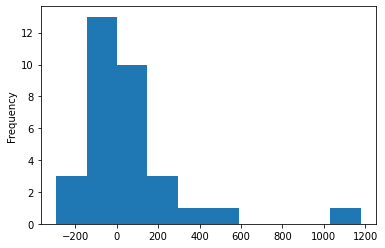

In [ ]:
sub2_s1_data.mean(axis=0).plot.hist()

# Plot histogram to see the std distribution of 16 channels.

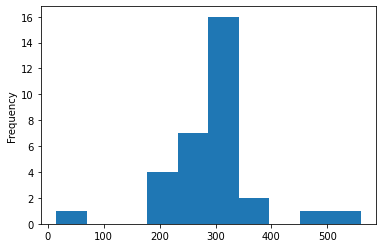

In [ ]:
sub2_s1_data.std(axis=0).plot.hist()

# Plot histograms for all 16 channels.

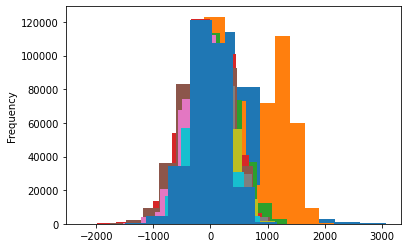

In [ ]:
for i in sub2_s1_data.columns[1:]:
  sub2_s1_data[i].plot.hist()

In [ ]:
normalized = normalize(sub2_s1_data)

NameError: ignored